In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import imdb
from keras import models, regularizers, optimizers, losses
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, Input
from keras.utils import to_categorical
from keras import backend as K
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [58]:
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [59]:
num_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

x_train = vectorize_sequences(x_train, num_words)
x_test = vectorize_sequences(x_test, num_words)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [60]:
print(x_train.shape)
print(y_train.shape)


(20000, 5000)
(20000,)


In [61]:
print("X ", x_train)
print("y: ", y_train)

X  [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
y:  [0. 0. 0. ... 1. 0. 0.]


In [62]:
model = models.Sequential()
model.add(Input((num_words,)))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │        80,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,161 (313.13 KB)

 Trainable params: 80,161 (313.13 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
epochs = 20
batch_size = 128
loss = losses.binary_crossentropy
opt = optimizers.RMSprop(0.001)

model.compile(loss=loss, optimizer=opt, metrics=['acc'])

In [64]:
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=epochs, batch_size=batch_size,
                    verbose=1)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.8436 - loss: 0.3995 - val_acc: 0.8796 - val_loss: 0.2967
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9080 - loss: 0.2453 - val_acc: 0.8898 - val_loss: 0.2764
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9236 - loss: 0.2095 - val_acc: 0.8886 - val_loss: 0.2866
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9295 - loss: 0.1894 - val_acc: 0.8892 - val_loss: 0.3054
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9373 - loss: 0.1775 - val_acc: 0.8824 - val_loss: 0.3165
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9425 - loss: 0.1655 - val_acc: 0.8800 - val_loss: 0.3287
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9452 - loss: 0.1588 - val_acc: 0.8762 - val_loss: 0.3408
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9493 - loss: 0.1499 - val_acc: 0.8708 - val_loss: 0.3542
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - ac

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Validation loss: 0.5068809986114502
Validation accuracy: 0.8547599911689758


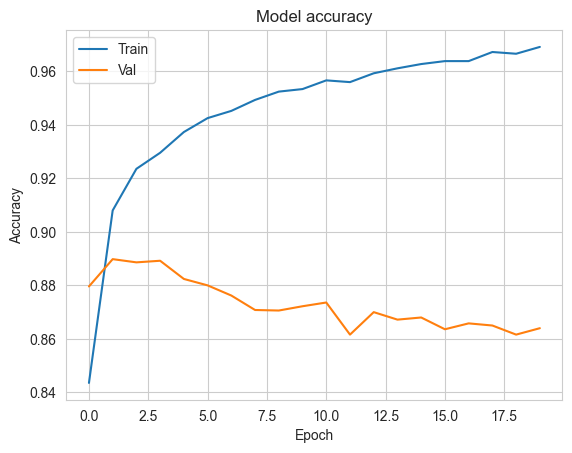

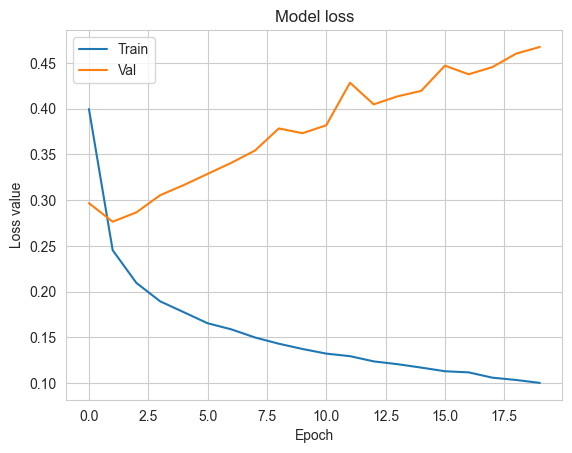

In [66]:
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()